In [1]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv('Dataset.csv')

In [3]:
# Display basic information about the dataset
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [4]:
# The 'Cuisines' column is of type string and split it into lists
df['Cuisines'] = df['Cuisines'].astype(str).apply(lambda x: x.split(', '))

In [5]:
# Identify the most common combinations of cuisines
# Count the occurrences of each unique combination of cuisines
cuisine_combinations = df['Cuisines'].apply(lambda x: tuple(sorted(x)))
combination_counts = Counter(cuisine_combinations)

In [6]:
# Display the 10 most common combinations of cuisines
most_common_combinations = combination_counts.most_common(10)
print("Most Common Cuisine Combinations:")
for combo, count in most_common_combinations:
    print(f"{combo}: {count} occurrences")

Most Common Cuisine Combinations:
('North Indian',): 936 occurrences
('Chinese', 'North Indian'): 616 occurrences
('Mughlai', 'North Indian'): 394 occurrences
('Chinese',): 354 occurrences
('Fast Food',): 354 occurrences
('Chinese', 'Mughlai', 'North Indian'): 306 occurrences
('Cafe',): 299 occurrences
('Bakery',): 218 occurrences
('Bakery', 'Desserts'): 181 occurrences
('Chinese', 'Fast Food'): 159 occurrences


In [7]:
# Determine if certain cuisine combinations tend to have higher ratings
# Create a DataFrame with cuisine combinations and their corresponding ratings
df['Cuisine Combination'] = df['Cuisines'].apply(lambda x: ', '.join(sorted(x)))
avg_ratings = df.groupby('Cuisine Combination')['Aggregate rating'].mean().reset_index()
avg_ratings = avg_ratings.sort_values(by='Aggregate rating', ascending=False)

In [8]:
# Display the top 10 cuisine combinations with the highest average ratings
print("\nTop 10 Cuisine Combinations with Highest Average Ratings:")
print(avg_ratings.head(10))


Top 10 Cuisine Combinations with Highest Average Ratings:
               Cuisine Combination  Aggregate rating
1131             Hawaiian, Seafood               4.9
84    American, Caribbean, Seafood               4.9
31         American, BBQ, Sandwich               4.9
1166             Indonesian, Sunda               4.9
377   Bakery, Continental, Italian               4.9
158        American, Sandwich, Tea               4.9
996                  Deli, Italian               4.9
266        Asian, European, Indian               4.9
317       BBQ, Breakfast, Southern               4.9
908         Contemporary, European               4.9


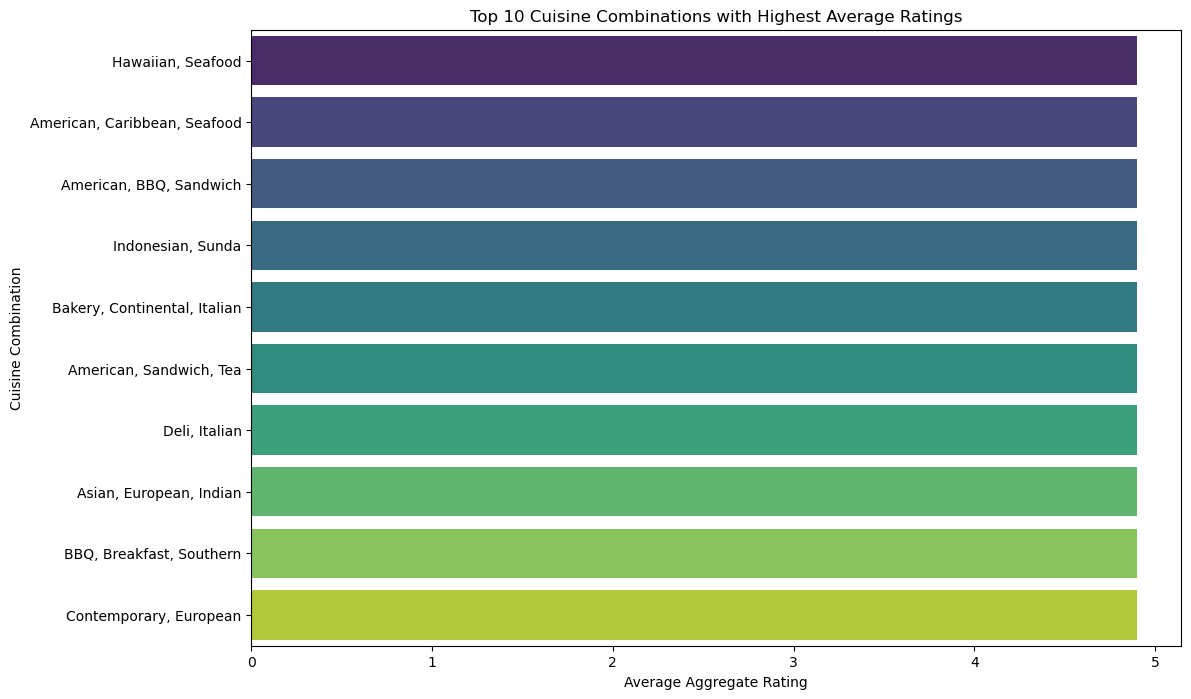

In [9]:
# Plot the top 10 cuisine combinations with the highest average ratings
plt.figure(figsize=(12, 8))
sns.barplot(x='Aggregate rating', y='Cuisine Combination', data=avg_ratings.head(10), palette="viridis")
plt.title('Top 10 Cuisine Combinations with Highest Average Ratings')
plt.xlabel('Average Aggregate Rating')
plt.ylabel('Cuisine Combination')
plt.show()